## MNIST classification for TF2.0
### Import Library

In [6]:
import tensorflow as tf
print(tf.__version__)

import numpy as np
import matplotlib.pyplot as plt

2.5.0


### Build Model

In [103]:
### Dataset Load
mnist = tf.keras.datasets.mnist

(x_train, y_train), (x_test, y_test) = mnist.load_data()

x_train = x_train.reshape((60000, 28, 28, 1))
x_test = x_test.reshape((10000, 28, 28, 1))

x_train, x_test = x_train / 255.0, x_test / 255.0

### 층을 차례대로 쌓아 tf.keras.Sequential 모델을 만든다.
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(filters=5, kernel_size=(3, 3), activation='relu', input_shape=(28, 28, 1), name='hidden_1'),
    tf.keras.layers.MaxPool2D(pool_size=(2, 2), name='pool_1'),
    tf.keras.layers.Conv2D(filters=5, kernel_size=(3, 3), activation='relu', name='hidden_2'),
    tf.keras.layers.MaxPool2D(pool_size=(2, 2), name='pool_2'),
    tf.keras.layers.Conv2D(filters=20, kernel_size=(3, 3), activation='relu', name='hidden_3'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax')
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

### Train and Evaluate Model

In [104]:
model.fit(x_train, y_train, epochs=5)
model.evaluate(x_test, y_test, verbose=2)

Epoch 1/5
1875/1875 [==============================] - 14s 7ms/step - loss: 0.3451 - accuracy: 0.8929
Epoch 2/5
1875/1875 [==============================] - 15s 8ms/step - loss: 0.1418 - accuracy: 0.9554
Epoch 3/5
1875/1875 [==============================] - 14s 8ms/step - loss: 0.1112 - accuracy: 0.9651
Epoch 4/5
1875/1875 [==============================] - 14s 8ms/step - loss: 0.0942 - accuracy: 0.9697
Epoch 5/5
1875/1875 [==============================] - 14s 8ms/step - loss: 0.0812 - accuracy: 0.9740
313/313 - 1s - loss: 0.0534 - accuracy: 0.9835


[0.05339290201663971, 0.9835000038146973]

## 합성곱 신경망 시각화 하기
### 테스트 데이터에 대해 데이터 0번을 시각화 하는 코드

(28, 28, 1)
7


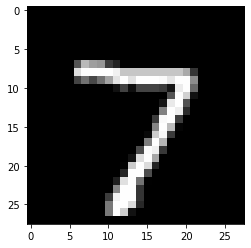

In [105]:
index = 0

imageToUse = x_test[index]
imageLabel = y_test[index]

print(imageToUse.shape)
print(imageLabel)

plt.imshow(imageToUse, interpolation='nearest', cmap='gray')

### 합성곱 신경망이 0번째 손글씨 이미지를 예측하는 코드

In [106]:
x_test[index].shape
predict = model.predict(imageToUse.reshape(-1, 28, 28, 1))

print(predict.argmax())   # 최댓값 인덱스 출력
print(predict.argmax() == imageLabel)

7
True


### 합성곱 신경망이 테스트 데이터 924번을 어떻게 예측하는지 숫자별로 확률을 보여주는 코드

(28, 28, 1)
2
[0] 0.063%
[1] 0.011%
[2] 61.349%
[3] 1.346%
[4] 0.000%
[5] 0.000%
[6] 0.000%
[7] 36.343%
[8] 0.847%
[9] 0.040%


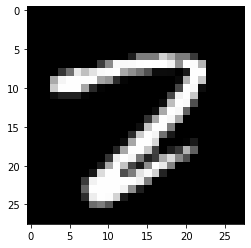

In [107]:
index = 924

imageToUse = x_test[index]
imageLabel = y_test[index]

print(imageToUse.shape)
print(imageLabel)

plt.imshow(imageToUse, interpolation='nearest', cmap='gray')

mat = model.predict(imageToUse.reshape(-1, 28, 28, 1))

for idx, item in enumerate(mat[0]):
    print('[{}] {:.3%}'.format(idx, item))

### 은닉층 연산 결과를 시각화 하는 코드

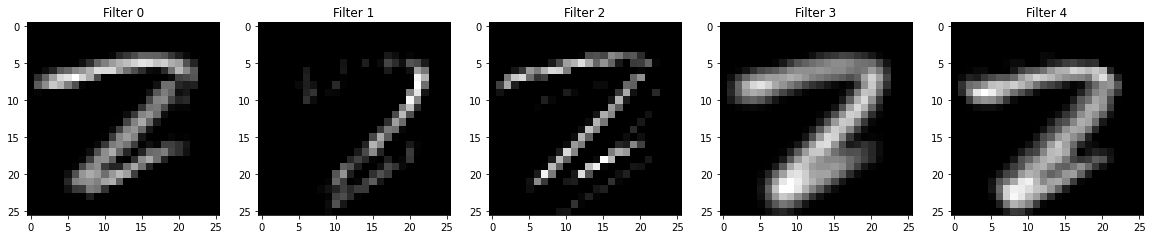

In [108]:
import math

### 은닉층 연산 결과를 시각화 하는 코드
def visualize_layers(layer_name):
    layer_output = model.get_layer(layer_name).output
    intermediate_model = tf.keras.models.Model(inputs=model.input, outputs=layer_output)
    intermediate_prediction = intermediate_model.predict(imageToUse.reshape(-1, 28, 28, 1))
    
    filters = filters = layer_output.shape[3]
    plt.figure(1, figsize=(20, 20))
    n_columns = 5
    n_rows = math.ceil(filters / n_columns) + 1
    
    for i in range(filters):
        plt.subplot(n_rows, n_columns, i+1)
        plt.title('Filter ' + str(i))
        plt.imshow(intermediate_prediction[0, :, :, i], interpolation='nearest', cmap='gray')
    
visualize_layers('hidden_1')


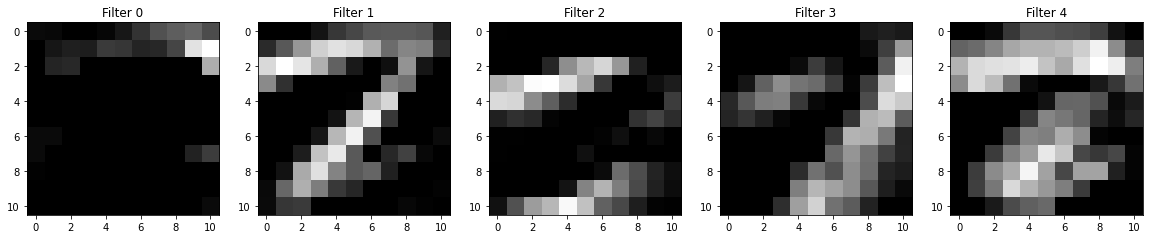

In [110]:
visualize_layers('hidden_2')

In [ ]:
visualize_layers('hidden_3')